Tutorial led by Huy Bui (@williamhuybui) from medium.com. Concepts crossed with Jason Brownlee of Machine Learning Mastery

# 1. Gini Impurity and Gini Index

## Gini impurity is the loss function being used in the CART method. Gini Impurity measures <i> how much noise a category has <i>.

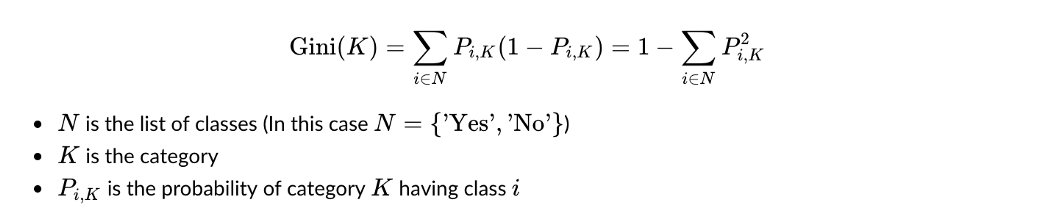

In [28]:
import pandas as pd

classification=['Freshman','Freshman','Sophomore','Junior','Freshman','Sophomore']
hour_of_practice=['>2h','>2h','>2h','<2h','>2h','<2h']
pass_the_quiz=['Yes','Yes','Yes', 'Yes', 'No','No']

df=pd.DataFrame({'Classification':classification, 
                'hour of practice':hour_of_practice, 
                "Pass the quiz":pass_the_quiz })
df

,Classification,hour of practice,Pass the quiz
0,Freshman,>2h,Yes
1,Freshman,>2h,Yes
2,Sophomore,>2h,Yes
3,Junior,<2h,Yes
4,Freshman,>2h,No
5,Sophomore,<2h,No


# Gini Index

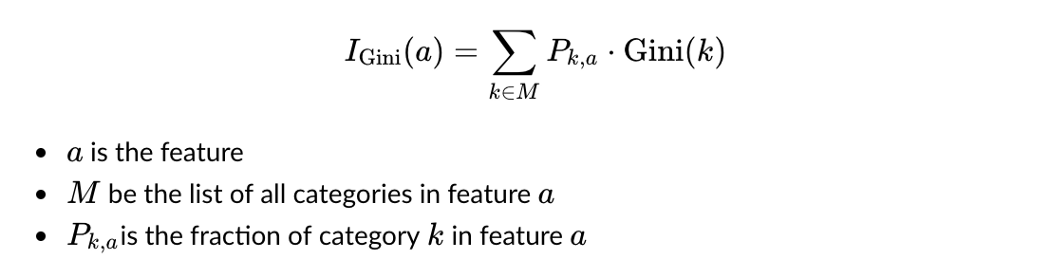

In [39]:
# Input Format(df, feature name, category name ,target name, list of all classes)
# where df is the current node observation
def gini(df,feature,category,target,classes_list):
    df=df[df[feature]==category]
    def P_i_K(i):
        return len(df[df[target]==i])/len(df)
        
    result=1-sum([(P_i_K(i))**2 for i in classes_list])
    return result

# Input Format(df, feature name, target name, list of all classes)
def Gini_index(df,feature,target,classes_list):
    def P_k_a(category):
        return len(df[df[feature]==category])/len(df)
    
    result=0
    for category in df[feature].unique():
        gini_value=gini(df,feature,category,target,classes_list) 
        P_k_a_value=P_k_a(category)
        result+=gini_value*P_k_a_value
    return result

In [41]:
print("Gini Index of Classification",
      Gini_index(df,"Classification","Pass the quiz",['Yes','No']))
print("Gini Index of hour of practice", 
      Gini_index(df,"hour of practice","Pass the quiz",['Yes','No']))

Gini Index of Classification 0.38888888888888884
Gini Index of hour of practice 0.41666666666666663


<b> Since Classification has less noise than the hour of practice, the first split goes for the Classification feature. We will visualize the tree after discussing the entropy concept.

# III) Entropy and Information Gain


## 1)Entropy

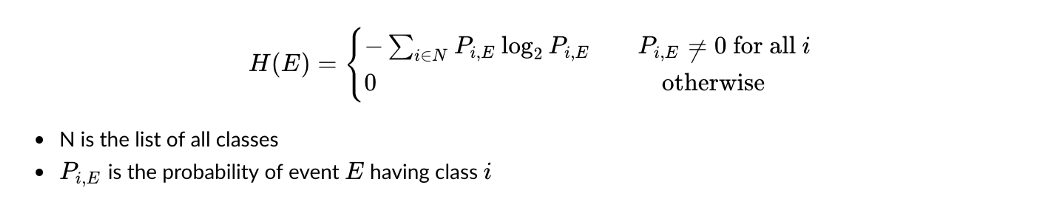

### <b> For the freshman, sophomore, and junior we obtain

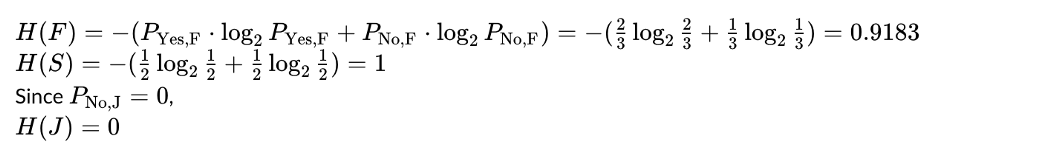

## Information Gain
After obtaining the entropy for each category, we can combine them to get the information gain values for the features. The more information we gain, the better. The formula is:

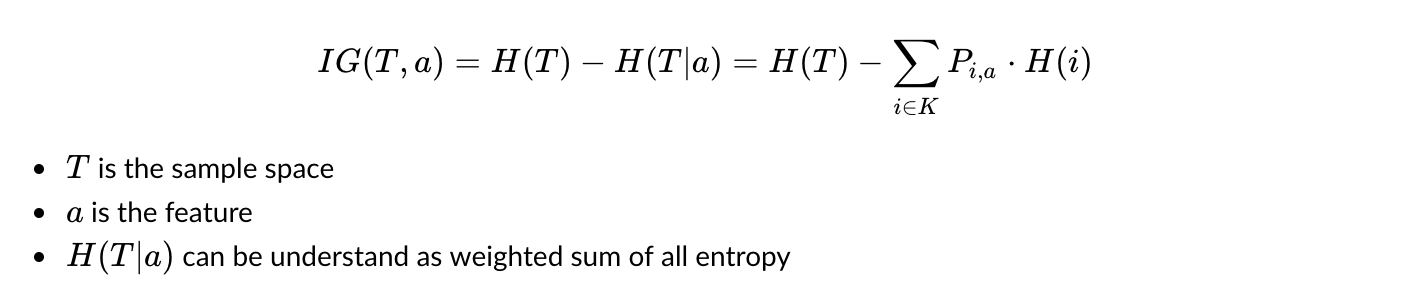

Applying this formula to our “Classification” feature yields:

[-]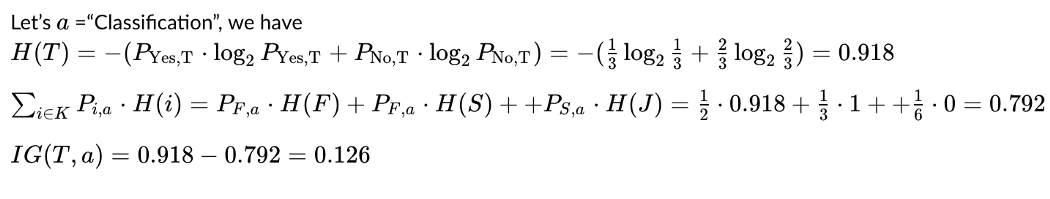

In [42]:
# Input Format(df,feature name K,category name,target name, list of all classes)
# Pass feature, category None if want to find the entropy of the whole observation
import math
def entropy(df,feature,category,target,classes_list):
    
    if (feature!=None)|(category!=None):
        df=df[df[feature]==category]
        
    def P_i_k(class_):
        return len(df[df[target]==class_])/len(df)
    
    result=0
    for class_ in classes_list:
        P_i_k_value=P_i_k(class_)
        if P_i_k_value!=0:
            result+=P_i_k_value*math.log(P_i_k_value,2)
    return -1*result
# Input Format(df,feature name K,category name,target name,list of all classes)
def InfoGain(df,feature,target,classes_list):
    H_T=entropy(df,None,None,target,classes_list)    
    def P_i_a(category,feature):
        return len(df[df[feature]==category])/len(df)
    
    result=0
    
    for category in df[feature].unique():
        result+=P_i_a(category, feature)*entropy(df,feature,category,target,classes_list)
    result=H_T-result
    return result


In [43]:
print("Information Gain of Classification", 
      InfoGain(df,'Classification','Pass the quiz',['Yes','No']))
print("Information Gain of hour of practice", 
      InfoGain(df,'hour of practice','Pass the quiz',['Yes','No']))

Information Gain of Classification 0.12581458369391152
Information Gain of hour of practice 0.044110417748401076


# Classification has more 'information' and so will be our first split

# Both methods reveal classification as the first split

# IV) Visualizing the tree

In both methods, Classification is the first pick. The second split is the remaining feature, the hour of study, and we obtain the following tree:

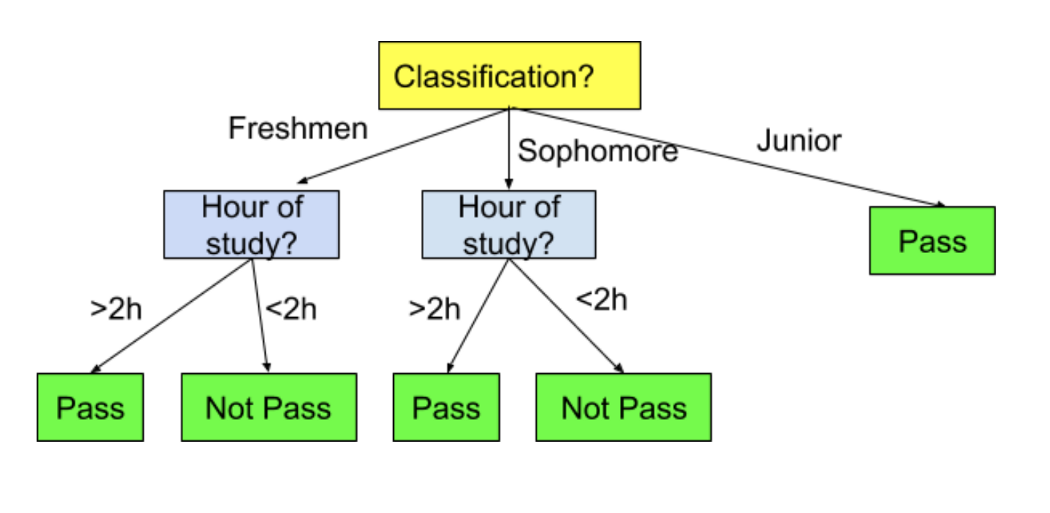

# V) Criteria to stop the splitting tree

<b>The number of observations in the nodes:</b> The ideal upper bound is 5% of the total training dataset.

<b>The node’s purity:</b> The Gini index shows how much noise each feature has for the current dataset and then choose the minimum noise feature to apply recursion. We can set the maximum bar for the Gini Index here as the stopping criteria to notify the branch that it is time to make the decision.

<b>The tree’s depth:</b> we can pre-specified the limit of the depth so that the tree won't expand excessively when facing complex datasets.

<b>Max feature:</b> Since the tree is split by feature, reducing the number of features will result in reducing the size of the tree. Only choosing the feature that has a high Information Gain or low Gini Index can be a good idea.